### Investigation of data from PCO2 instrument

Theres alot of data here, but not clear what we'll do with it

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob

Combining the data from multiple PCO2 files

In [2]:
import obspy as op

In [3]:
pco2_dfs= list(sorted(glob.glob('pco2*.txt')))

In [4]:
master_df = pd.read_csv(pco2_dfs[0],skiprows=8,names=["info","CO2","CellTemp",
                "Pressure","Flow",'CO2(ppm)','pCO2','equilT','SBE38',"ID#","ID","lat","lon","cog",
                "sog","sst","salinity","baroP","wind_speed","wind_dir"],header=1)

for infile in pco2_dfs[1:]:
    df = pd.read_csv(infile,skiprows=8,names=["info","CO2","CellTemp",
                "Pressure","Flow",'CO2(ppm)','pCO2','equilT','SBE38',"ID#","ID","lat","lon","cog",
                "sog","sst","salinity","baroP","wind_speed","wind_dir"],header=1)

    master_df = pd.concat([master_df,df])

In [5]:
master_df['latitude'] = master_df['lat'].apply(lambda x:  float(x.split()[0][:2]) + float(x.split()[0][2:])/60 )
master_df['longitude'] = master_df['lon'].apply(lambda x: -1*(float(x.split()[0][:3]) + float(x.split()[0][3:])/60) )
master_df.drop(['lat','lon'],axis=1,inplace=True)

In [6]:
master_df['time'] = pd.to_datetime(master_df['info'].apply(lambda x: x.split('\t')[1]))

In [7]:
master_df.drop('info',axis=1,inplace=True)

In [8]:
master_df.to_csv('tmp.csv',index=False)

In [9]:
master_df.head()

,CO2,CellTemp,Pressure,Flow,CO2(ppm),pCO2,equilT,SBE38,ID#,ID,cog,sog,sst,salinity,baroP,wind_speed,wind_dir,latitude,longitude,time
0,2399.95,25.71,1004.41,58.72,404.74,397.50,6.33,6.46,4.0,CC25652,202.81,9.9,5.9657,30.3248,1002.8,7.4,168.4,59.956527,-149.371573,2018-05-09 17:37:17.437300
1,853.42,26.50,1004.48,56.54,104.09,102.24,6.25,6.39,6.0,CA06684,202.76,9.9,5.8715,30.6653,1002.8,5.2,201.8,59.947056,-149.379593,2018-05-09 17:41:02.958400
2,2823.20,27.22,1004.45,58.06,516.33,507.17,6.16,6.30,8.0,CA02237,202.74,9.9,5.8102,30.6021,1002.9,6.4,246.8,59.937722,-149.387609,2018-05-09 17:44:44.889300
3,2309.19,27.90,1004.36,59.69,387.12,380.24,6.07,6.23,10.0,CA06616,202.63,9.7,5.9668,30.9041,1002.8,7.1,254.5,59.928466,-149.395536,2018-05-09 17:48:27.357000
4,1719.91,28.54,1003.86,57.06,259.30,254.54,6.24,6.28,12.0,CC46471,200.87,9.6,5.9746,30.2364,1002.6,8.6,277.1,59.919313,-149.402748,2018-05-09 17:52:11.256900


In [10]:
master_df[['longitude','latitude']].to_csv("shiptrack_full.dat",index=False)

Text(0.5,0,'Speed (knots)')

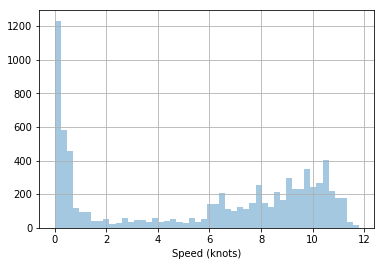

In [58]:
sns.distplot(master_df['sog'],kde=False,bins=50)
plt.grid()
plt.xlabel("Speed (knots)")

In [23]:
master_df.describe()

,CO2,CellTemp,Pressure,Flow,CO2(ppm),pCO2,equilT,SBE38,ID#,cog,sog,sst,salinity,baroP,wind_speed,wind_dir,latitude,longitude
count,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000
mean,1909.474217,41.795153,1005.096885,53.026509,323.951929,318.246519,6.336129,6.655971,1.154635,178.313984,5.668376,6.246755,32.106637,1003.668429,13.885339,165.249980,55.484878,-156.196381
std,501.734700,1.180999,8.381624,4.174094,104.744688,102.591190,0.613019,0.612458,2.784287,104.542771,4.198133,0.620835,0.407813,8.381004,6.814283,100.455372,1.265815,3.107443
min,75.670000,24.040000,987.310000,42.190000,0.000000,0.000000,4.830000,5.160000,0.000000,0.020000,0.000000,4.721500,30.236400,986.000000,0.200000,0.000000,53.789183,-161.375152
25%,1633.940000,41.510000,1000.020000,50.860000,259.140000,253.520000,5.770000,6.090000,0.000000,80.880000,0.500000,5.669900,31.803800,998.600000,8.800000,73.300000,54.507864,-158.485306
50%,1959.790000,41.760000,1004.470000,51.840000,326.720000,321.830000,6.460000,6.780000,0.000000,181.240000,7.000000,6.367400,32.095000,1003.100000,13.000000,168.000000,55.211573,-156.576123
75%,2232.320000,42.160000,1013.130000,55.390000,390.860000,384.730000,6.860000,7.180000,1.000000,268.500000,9.600000,6.778800,32.476100,1011.500000,18.600000,252.100000,56.143543,-153.854466
max,3200.680000,43.860000,1017.620000,65.290000,660.010000,638.760000,7.680000,7.880000,12.000000,359.940000,11.800000,7.500200,32.748500,1016.300000,47.300000,359.900000,59.956527,-149.371573


Text(-2.7,0.5,'Barometric pressure (Psa)')

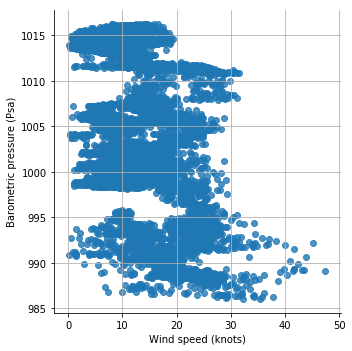

In [24]:
sns.lmplot(x='wind_speed',y='baroP',data=master_df,fit_reg=False)
plt.grid()
plt.xlabel('Wind speed (knots)')
plt.ylabel('Barometric pressure (Psa)')

There are clusters here. These evidently correspond to when this ship was at different locations

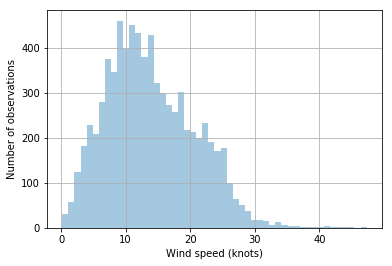

In [25]:
sns.distplot(master_df['wind_speed'],kde=False,bins=50)
plt.ylabel('Number of observations')
plt.xlabel('Wind speed (knots)')
plt.grid()

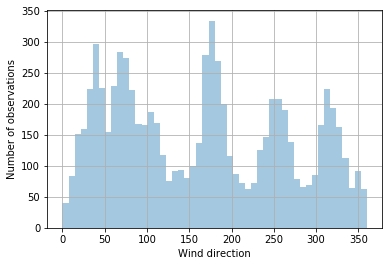

In [26]:
sns.distplot(master_df['wind_dir'],kde=False,bins=50)
plt.ylabel('Number of observations')
plt.xlabel('Wind direction')
plt.grid()

We just need the last few lines of this file

In [27]:
master_df['hour'] = master_df['time'].apply(lambda x: op.UTCDateTime(x).hour)

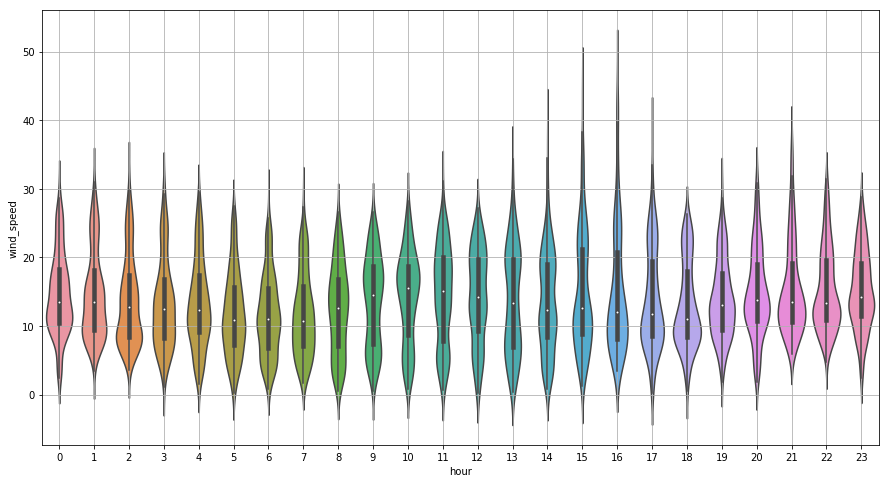

In [28]:
plt.figure(figsize=(15,8))
sns.violinplot(x='hour',y='wind_speed',data=master_df)
plt.grid()

### Some basic pandas viz 

In [29]:
master_df.head()

,CO2,CellTemp,Pressure,Flow,CO2(ppm),pCO2,equilT,SBE38,ID#,ID,...,sog,sst,salinity,baroP,wind_speed,wind_dir,latitude,longitude,time,hour
0,2399.95,25.71,1004.41,58.72,404.74,397.50,6.33,6.46,4.0,CC25652,...,9.9,5.9657,30.3248,1002.8,7.4,168.4,59.956527,-149.371573,2018-05-09 17:37:17.437300,17
1,853.42,26.50,1004.48,56.54,104.09,102.24,6.25,6.39,6.0,CA06684,...,9.9,5.8715,30.6653,1002.8,5.2,201.8,59.947056,-149.379593,2018-05-09 17:41:02.958400,17
2,2823.20,27.22,1004.45,58.06,516.33,507.17,6.16,6.30,8.0,CA02237,...,9.9,5.8102,30.6021,1002.9,6.4,246.8,59.937722,-149.387609,2018-05-09 17:44:44.889300,17
3,2309.19,27.90,1004.36,59.69,387.12,380.24,6.07,6.23,10.0,CA06616,...,9.7,5.9668,30.9041,1002.8,7.1,254.5,59.928466,-149.395536,2018-05-09 17:48:27.357000,17
4,1719.91,28.54,1003.86,57.06,259.30,254.54,6.24,6.28,12.0,CC46471,...,9.6,5.9746,30.2364,1002.6,8.6,277.1,59.919313,-149.402748,2018-05-09 17:52:11.256900,17


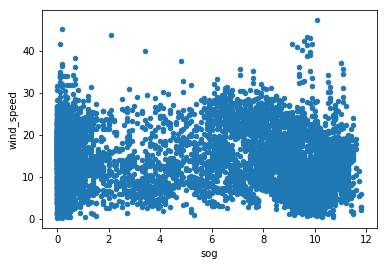

In [30]:
master_df.plot(x='sog',y='wind_speed',kind='scatter')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22fc9e10>,
      dtype=object)

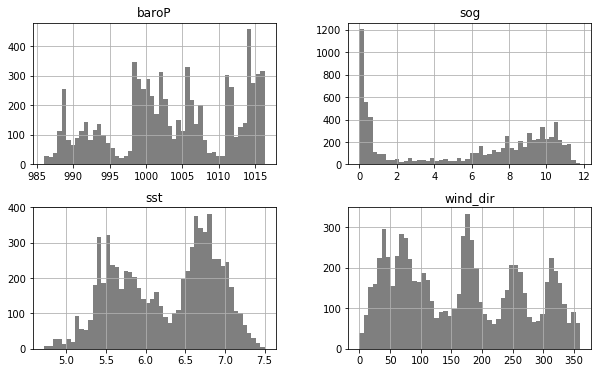

In [31]:
#This is the best way of quickly plotting multiple histograms
master_df[['sog','sst','wind_dir','baroP']].hist(color='k',alpha=0.5,bins=50,figsize=(10,6))

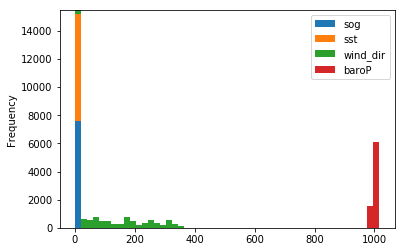

In [32]:
#The stacked histogram works for items that are roughly on the same scale
master_df[['sog','sst','wind_dir','baroP']].plot.hist(stacked=True,bins=50)

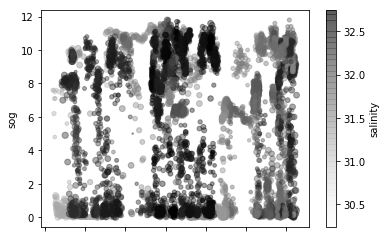

In [33]:
#possible to easily change the size of the plot elements according to some other field
master_df.plot.scatter(x='baroP',y='sog',s=df['wind_speed']*2,c='salinity',alpha=0.4)

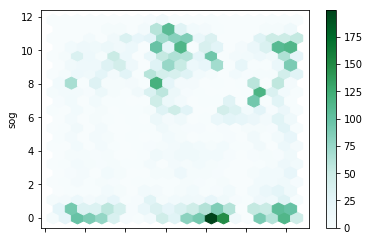

In [34]:
master_df.plot.hexbin(x='baroP',y='sog',gridsize=20)

In [35]:
from pandas.plotting import bootstrap_plot

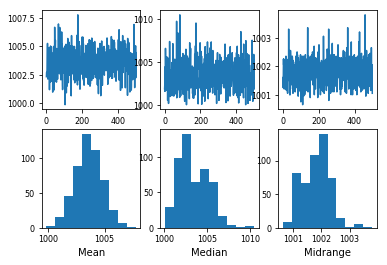

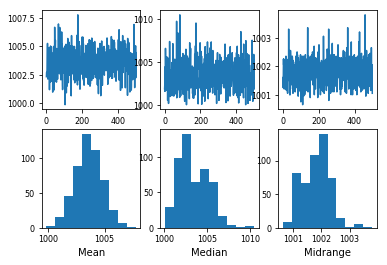

In [36]:
bootstrap_plot(master_df['baroP'],size=50,samples=500)

In [37]:
colors = dict(boxes='DarkGreen',whiskers='DarkOrange',medians='DarkBlue',
             caps='Gray')

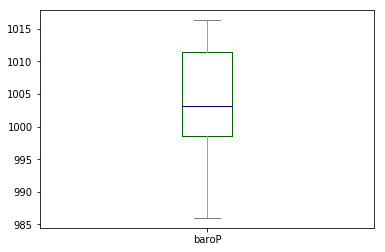

In [38]:
master_df[['baroP']].plot.box(color=colors,sym='r+')

In [39]:
import requests
import pandas as pd

In [40]:
base_url="http://data.sikuliaq.alaska.edu/archive/SKQ201811S/lds/raw/pco2_ldeo_merge/"

In [41]:
response = requests.get(base_url)
page = response.content
table = pd.read_html(page)[0]
fname = table.loc[len(table)-1][1]
response = requests.get(base_url+fname)
page = str(response.content)
sdata = page.split('\\n')[-2]

In [42]:
latval = sdata.split('\\t')[2].split(',')[11].strip().split()[0]
lonval = sdata.split('\\t')[2].split(',')[12].strip().split()[0]

In [43]:
print(latval,lonval)

5652.983057 15059.977485


In [44]:
print(float(latval[:2]) + float(latval[2:])/60)
lv = float(lonval[:3]) + float(lonval[3:])/60
print(-lv)

56.88305095
-150.99962475


In [45]:
sdata.split('\\t')[2].split(',')[-6]

'0.4'

In [46]:
df = pd.read_csv('pco2_ldeo_merge.20180510T0001Z.txt',skiprows=8,names=["info","CO2","CellTemp",
                "Pressure","Flow",'CO2(ppm)','pCO2','equilT','SBE38',"ID#","ID","lat","lon","cog",
                "sog","sst","salinity","baroP","wind_speed","wind_dir"],header=1)

In [47]:
partial_ship_track = df[['lon','lat']]
partial_ship_track.head()

,lon,lat
0,15000.758473 W,5912.910959 N
1,15001.441226 W,5912.552004 N
2,15002.136830 W,5912.199405 N
3,15002.830002 W,5911.857088 N
4,15003.528718 W,5911.517847 N


In [65]:
partial_ship_track['latitude'] = partial_ship_track['lat'].apply(lambda x:  float(x.split()[0][:2]) + float(x.split()[0][2:])/60 )
partial_ship_track['longitude'] = partial_ship_track['lon'].apply(lambda x: -1*(float(x.split()[0][:3]) + float(x.split()[0][3:])/60) )

/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
partial_ship_track.head()
partial_ship_track['t1'] = np.full(len(partial_ship_track['lon']),np.nan)
partial_ship_track['t2'] = np.full(len(partial_ship_track['lon']),np.nan)
partial_ship_track['speed'] = np.full(len(partial_ship_track['lon']),np.nan)
partial_ship_track['heading'] = np.full(len(partial_ship_track['lon']),np.nan)

/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [67]:
partial_ship_track[['t1','t1','longitude','latitude','speed','heading']].to_csv('partial_ship_track.dat',index=False)

In [62]:
0.453*1400

634.2